# Introduction

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which can be downloaded from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The data has several columns, including the following:

- RespondentID — An anonymized ID for the respondent (person taking the survey)
- Gender — the respondent's gender
- Age — the respondent's age
- Household Income — the respondent's income
- Education — the respondent's education level
- Location (Census Region) — the respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

# Data importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

star_wars = star_wars.loc[1:,:] #Remove first row, which is another header row

display(star_wars.columns)
display(star_wars.head(10))

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,4,3,6,5,2,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorabl

# Data cleaning

## Converting yes/no questions to true/false

'Have you seen any of the 6 films in the Star Wars franchise?' and 'Do you consider yourself to be a fan of the Star Wars film franchise?' are both yes/no/na questions. Converting these values into true/false will make analysis easier.

In [2]:
yes_no = {
    'Yes': True,
    'No': False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

display(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())
display(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Converting cell questions to true/false

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

- Which of the following Star Wars films have you seen? Please select all that apply. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 — whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [3]:
# Changing long string values for true/false values
films_yesno = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.nan: False
}


for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(films_yesno)


# Changing columns' names
films_seen = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
}

star_wars = star_wars.rename(columns=films_seen)


display(star_wars.head())

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Converting numeric values stored as string to float

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 — How much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 — How much the respondent liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 — How much the respondent liked Star Wars: Episode IV A New Hope
- Unnamed: 13 — How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 — How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [4]:
# Converting string values to float
star_wars.loc[:, star_wars.columns[9:15]] = star_wars.loc[:, star_wars.columns[9:15]].astype(float)

#Renaming ranking columns names
films_rank = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}

star_wars = star_wars.rename(columns=films_rank)


display(star_wars.head())

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Data analysis

## Most ranked Star Wars film

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie quicker.

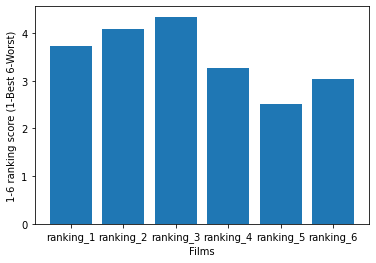

In [5]:
# Calculating the mean ranking for each film
means = star_wars[star_wars.columns[9:15]].mean()

# Preparing and plotting the results
means = means.reset_index()
means.columns = ['rank_nbr', 'mean']

plt.bar(x=means['rank_nbr'], height=means['mean'])
plt.xlabel('Films')
plt.ylabel('1-6 ranking score (1-Best 6-Worst)')
plt.show()

The bar plot above shows that, **while the fifth episode 'The Empire Strikes Back' is the best ranked film, the third episode 'Revenge of the Sith' is the worst ranked**.

Although 'Revenge of the Sith' is way better than episodes I and II 'The Phantom Menace' and 'Attack of the Clones', we'll continue analysing this meaningless data :)


## Most watched Star Wars film

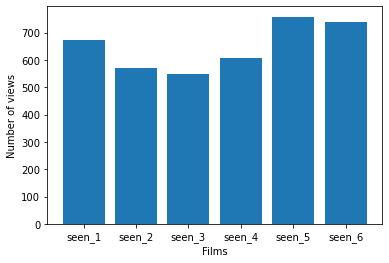

In [6]:
# Calculating the number of views per film
watched = star_wars[star_wars.columns[3:9]].sum()

# Preparing and plotting the results
watched = watched.reset_index()

watched.columns = ['seen', '#views']

plt.bar(x=watched['seen'], height=watched['#views'])
plt.xlabel('Films')
plt.ylabel('Number of views')
plt.show()

The graph above shows that **episode V 'The Empire Strikes Back' is the most watched episode, while, after the release of episode I 'The Phantom Menace', the number of views for episodes 2 and 3 -reasonably- lowered**.


## Do results differ if you consider yourself a Star Wars fan?

Next, we'll repeat the analysis on the most ranked and viewed Star Wars film, separating the results into two groups: Star Wars fans and regular people.

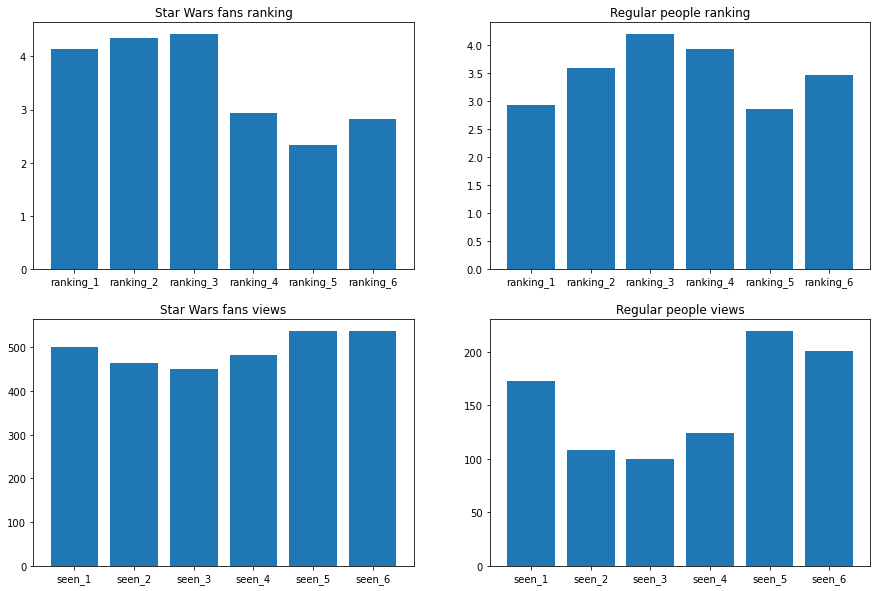

In [7]:
geeks = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
regulars = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

### Ranking results

# Star Wars fans - Calculating the mean ranking for each film
geeks_means = geeks[geeks.columns[9:15]].mean()

# Star Wars fans - Preparing and plotting the results
geeks_means = geeks_means.reset_index()
geeks_means.columns = ['rank_nbr', 'mean']

# Regular people - Calculating the mean ranking for each film
regulars_means = regulars[regulars.columns[9:15]].mean()

# Regular people - Preparing and plotting the results
regulars_means = regulars_means.reset_index()
regulars_means.columns = ['rank_nbr', 'mean']


### Views results

# Star Wars fans - Calculating the number of views per film
geeks_watched = geeks[geeks.columns[3:9]].sum()

# Star Wars fans - Preparing and plotting the results
geeks_watched = geeks_watched.reset_index()
geeks_watched.columns = ['seen', '#views']

# Regular people - Calculating the number of views per film
regulars_watched = regulars[regulars.columns[3:9]].sum()

# Regular people - Preparing and plotting the results
regulars_watched = regulars_watched.reset_index()
regulars_watched.columns = ['seen', '#views']



### Plotting everything in a grid

plt.rcParams["figure.figsize"] = [15, 10]

fig, axs = plt.subplots(2, 2)

axs[0, 0].bar(x=geeks_means['rank_nbr'], height=geeks_means['mean'])
axs[0, 0].set_title('Star Wars fans ranking')

axs[0, 1].bar(x=regulars_means['rank_nbr'], height=regulars_means['mean'])
axs[0, 1].set_title('Regular people ranking')

axs[1, 0].bar(x=geeks_watched['seen'], height=geeks_watched['#views'])
axs[1, 0].set_title('Star Wars fans views')

axs[1, 1].bar(x=regulars_watched['seen'], height=regulars_watched['#views'])
axs[1, 1].set_title('Regular people views')

plt.show()

The grid above shows that **'Episode V The Empire Strikes Back' is the best rated Star Wars film for both fans and regular people**. However, regular people -incredibly- rank 'Episode I The Phantom Menace' almost as high as Episode V, while fans clearly dislike this movie. Furthermore, both groups agree that the great transformation that finally occurs from Anakin Skywalker to Darth Vader in **'Episode III Revenge of the Sith' is the worst ranked** (no comments on this part).

The number of relative views per movie doesn't differ from fans to regular people. The order from most viewed to least viewed are:
1. Episode V The Empire Strikes Back
2. Episode VI Return of the Jedi
3. Episode I The Phantom Menace
4. Episode IV A New Hope
5. Episode II Attack of the Clones
6. Episode III Revenge of the Sith


# Conclussion

The present project has shown different interesting conclussions from the data we've just analyzed:

1. The question that the team at FiveThirtyEight became interested in answering  "does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?" resolves with a clear YES. **Everyone agrees that this is the best Star Wars movie - and the most viewed**.
2. **The worst ranked and least viewed movie is the third episode, "Revenge of the Sith"**.
3. **Star Wars fans and regular people distribute their number of views between films with a similar shape. However, Star Wars fans have a higher number of absolute views per film**.

Further analyses could continue exploring other columns from the data, or increase the sample by including responses referring to the newest and controversial trilogy (episodes VII to IX).